### Objective: 
**To find out the best classification algorithm to predict if a patient will have a stroke or not**

### Workflow:

1. **Load the dataset**
    - Gather the dataset, load it into the notebook and convert it into a pandas dataframe

2. **Preprocessing the data**
    - Clean the dataset by handling missing values, outliers, and duplicates.
    - Encode categorical variables and normalize/standardize numerical features.

3. **Feature Selection**
    - Select the most relevant features for the prediction task.

4. **Model Selection**
    - Use  Logistic regression , KNN and SVM models.

5. **Model Training**
    - Train the selected classification models on the training dataset.

6. **Model Evaluation**
    - Evaluate the trained models on the testing dataset using appropriate metrics.
    - Compare the 3 models based on the evaluation metrics


***Importing the necessary libraries required for pre-processing***

In [30]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns


***Loading the dataset***

In [31]:
data=pd.read_csv(r"C:\Users\Devab\OneDrive\Desktop\Coding\Machine Learning\Applications\Applications using multiple algorithms\KNN-SVM-Logistic\stroke_data.csv")

***Exploring the dataset***

***Exploring the dataset***

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [33]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

***Handling  Missing values and removing irrelevant columns***

***visualising the missing values in the dataset using a heatmap***

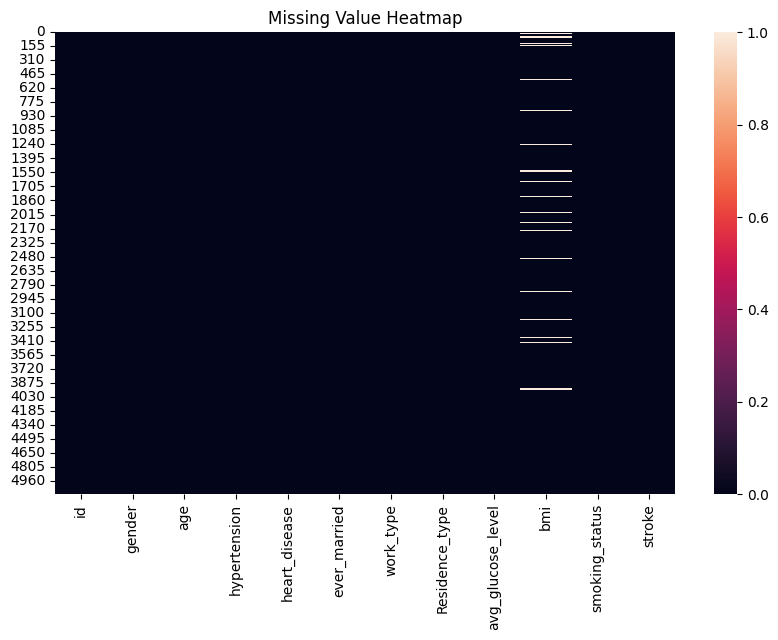

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())
plt.title('Missing Value Heatmap')
plt.show()

**Imputing the missing values in bmi column**

In [35]:
data["bmi"]=data["bmi"].fillna(data["bmi"].mean())
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Visualing to check for any missing values**

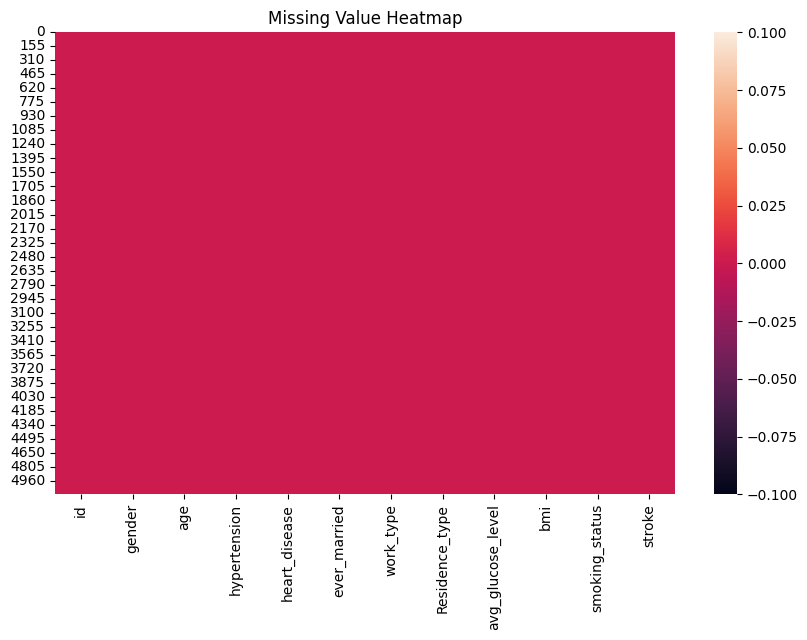

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())
plt.title('Missing Value Heatmap')
plt.show()

**Removing all the records which contain the "unknown" value**

In [37]:
# Replacing the records containing "Unknown" with NaN value 
data.replace("Unknown", pd.NA, inplace=True)
# Dropping the records with NaN values
data.dropna(inplace=True)

***Encoding all the categorical variables***


In [38]:
# Importing the libraries required to encode the categorical variables
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


Label encoding gender,ever_married and Residence_type columns

In [39]:
data["gender"]=label.fit_transform(data["gender"])
data["ever_married"]=label.fit_transform(data["ever_married"])
data["Residence_type"]=label.fit_transform(data["Residence_type"])


One-Hot encoding work_type and smoking_status columns

In [40]:
data=pd.get_dummies(data,columns=["work_type","smoking_status"],drop_first=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3566 entries, 0 to 5108
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3566 non-null   int64  
 1   gender                       3566 non-null   int32  
 2   age                          3566 non-null   float64
 3   hypertension                 3566 non-null   int64  
 4   heart_disease                3566 non-null   int64  
 5   ever_married                 3566 non-null   int32  
 6   Residence_type               3566 non-null   int32  
 7   avg_glucose_level            3566 non-null   float64
 8   bmi                          3566 non-null   float64
 9   stroke                       3566 non-null   int64  
 10  work_type_Never_worked       3566 non-null   bool   
 11  work_type_Private            3566 non-null   bool   
 12  work_type_Self-employed      3566 non-null   bool   
 13  work_type_children     

***Standardising the entire dataset using standard scaler***

In [42]:
# Importing the standard Scaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling the data excluding the target variable y
scaled_data = scaler.fit_transform(data.drop(columns=['stroke','id'],axis=1))
# converting the standardised numpy array into a dataframe with the columns of the original dataframe
scaled_data = pd.DataFrame(scaled_data, columns=data.drop(columns=['stroke','id']).columns)
scaled_data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,1.235835,0.961550,-0.378086,3.826271,0.562021,0.982762,2.479174,0.889508,-0.062781,0.748741,-0.477896,-0.140468,-1.063121,-0.533029
1,-0.807275,0.643614,-0.378086,-0.261351,0.562021,-1.017540,1.930768,-0.187547,-0.062781,-1.335576,2.092506,-0.140468,0.940626,-0.533029
2,1.235835,1.650411,-0.378086,3.826271,0.562021,-1.017540,-0.063415,0.316515,-0.062781,0.748741,-0.477896,-0.140468,0.940626,-0.533029
3,-0.807275,0.007742,-0.378086,-0.261351,0.562021,0.982762,1.289167,0.582048,-0.062781,0.748741,-0.477896,-0.140468,-1.063121,1.876072
4,-0.807275,1.597421,2.644904,-0.261351,0.562021,-1.017540,1.349019,-0.871398,-0.062781,-1.335576,2.092506,-0.140468,0.940626,-0.533029


***Splitting the dataset into test and train data***

**Selecting the features**

In [43]:
X = scaled_data


**Selecting the target variable**

In [44]:
y=data['stroke']

**Splitting the data**

In [45]:
# Importing the train_test_split library
from sklearn.model_selection import train_test_split
# Spliting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

***1.) Logistic Regression***

**Fitting  the data into the model and evaluating it**



In [46]:
# Importing the logistic regression model and initialisng it
from sklearn.linear_model import LogisticRegression

# Fitting the model with the 1st training data
lr= LogisticRegression(random_state=42)

# Fit the model using training data
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Evaluating the model**

In [47]:
# Importing the required evaluation metrics to evaluate the 3 models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [48]:
# Evaluating the logistic regression model using accuracy_score
a_score=accuracy_score(y_test, lr.predict(X_test))
print("The accuracy score for this logistic regression model is: ",a_score)
# Evaluating the logistic regression model using precision_score
p_score=precision_score(y_test, lr.predict(X_test))
print("The precision score for this logistic regression model is: ",p_score)
# Evaluating the logistic regression model using recall_score
r_score=recall_score(y_test, lr.predict(X_test))
print("The recall score for this logistic regression model is: ",r_score)
# Evaluating the logistic regression model using f1_score
f_score=f1_score(y_test, lr.predict(X_test))
print("The f1 score for this logistic regression model is: ",f_score)

The accuracy score for this logistic regression model is:  0.9338565022421524
The precision score for this logistic regression model is:  0.0
The recall score for this logistic regression model is:  0.0
The f1 score for this logistic regression model is:  0.0


c:\Users\Devab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***2.) KNN***

**Fitting  the data into the model and evaluating it**



In [49]:
# Importing the  knn Classifier model 
from sklearn.neighbors import KNeighborsClassifier 
# Initialising the models with multiple neighbours
m1=KNeighborsClassifier(n_neighbors=3)
m2=KNeighborsClassifier(n_neighbors=5)
m3=KNeighborsClassifier(n_neighbors=2)

**Fitting the 1st model**

In [50]:
m1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

**Evaluating the 1st model**

In [51]:
# Evaluating the KNN model using accuracy_score
a_score=accuracy_score(y_test,m1.predict(X_test))
print("The accuracy score for this KNN model is: ",a_score)
# Evaluating the  KNN model using precision_score
p_score=precision_score(y_test, m1.predict(X_test))
print("The precision score for this KNN model is: ",p_score)
# Evaluating the KNN model using recall_score
r_score=recall_score(y_test, m1.predict(X_test))
print("The recall score for this KNN model is: ",r_score)
# Evaluating the KNN model using f1_score
f_score=f1_score(y_test, m1.predict(X_test))
print("The f1 score for this KNN model is: ",f_score)

The accuracy score for this KNN model is:  0.9260089686098655
The precision score for this KNN model is:  0.1111111111111111
The recall score for this KNN model is:  0.01694915254237288
The f1 score for this KNN model is:  0.02941176470588235


**Visualising the model**

**Fitting the 2nd model**

In [52]:
m2.fit(X_train,y_train)


KNeighborsClassifier()

**Evaluating the 2nd model**

In [53]:
# Evaluating the KNN model using accuracy_score
a_score=accuracy_score(y_test,m2.predict(X_test))
print("The accuracy score for this KNN model is: ",a_score)
# Evaluating the  KNN model using precision_score
p_score=precision_score(y_test, m2.predict(X_test))
print("The precision score for this KNN model is: ",p_score)
# Evaluating the KNN model using recall_score
r_score=recall_score(y_test, m2.predict(X_test))
print("The recall score for this KNN model is: ",r_score)
# Evaluating the KNN model using f1_score
f_score=f1_score(y_test, m2.predict(X_test))
print("The f1 score for this KNN model is: ",f_score)

The accuracy score for this KNN model is:  0.9316143497757847
The precision score for this KNN model is:  0.25
The recall score for this KNN model is:  0.01694915254237288
The f1 score for this KNN model is:  0.031746031746031744


**Fitting the 3rd model**

In [54]:
m3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

**Evaluating the 3rd model**

In [55]:
# Evaluating the KNN model using accuracy_score
a_score=accuracy_score(y_test,m3.predict(X_test))
print("The accuracy score for this KNN model is: ",a_score)
# Evaluating the  KNN model using precision_score
p_score=precision_score(y_test, m3.predict(X_test))
print("The precision score for this KNN model is: ",p_score)
# Evaluating the KNN model using recall_score
r_score=recall_score(y_test, m3.predict(X_test))
print("The recall score for this KNN model is: ",r_score)
# Evaluating the KNN model using f1_score
f_score=f1_score(y_test, m3.predict(X_test))
print("The f1 score for this KNN model is: ",f_score)

The accuracy score for this KNN model is:  0.9304932735426009
The precision score for this KNN model is:  0.0
The recall score for this KNN model is:  0.0
The f1 score for this KNN model is:  0.0


***3.) SVM***

**Fitting  the data into the model and evaluating it**



In [56]:
# Importing the Support Vector Machines Classifier model and initialising it 
from sklearn.svm import SVC
svm=SVC()
# Fitting the model with the  training data
svm.fit(X_train,y_train)


SVC()

**Evaluating the  model**

In [57]:
# Evaluating the KNN model using accuracy_score
a_score=accuracy_score(y_test,svm.predict(X_test))
print("The accuracy score for this KNN model is: ",a_score)
# Evaluating the  KNN model using precision_score
p_score=precision_score(y_test,svm.predict(X_test))
print("The precision score for this KNN model is: ",p_score)
# Evaluating the KNN model using recall_score
r_score=recall_score(y_test, svm.predict(X_test))
print("The recall score for this KNN model is: ",r_score)
# Evaluating the KNN model using f1_score
f_score=f1_score(y_test, svm.predict(X_test))
print("The f1 score for this KNN model is: ",f_score)

The accuracy score for this KNN model is:  0.9338565022421524
The precision score for this KNN model is:  0.0
The recall score for this KNN model is:  0.0
The f1 score for this KNN model is:  0.0


c:\Users\Devab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Comparing the Performance of all 3 classification algorithms***